In [1]:
import torch

import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
import math

In [2]:
a = torch.linspace(0., 2. * math.pi, steps=25, requires_grad=True)
print(a)

tensor([0.0000, 0.2618, 0.5236, 0.7854, 1.0472, 1.3090, 1.5708, 1.8326, 2.0944,
        2.3562, 2.6180, 2.8798, 3.1416, 3.4034, 3.6652, 3.9270, 4.1888, 4.4506,
        4.7124, 4.9742, 5.2360, 5.4978, 5.7596, 6.0214, 6.2832],
       requires_grad=True)


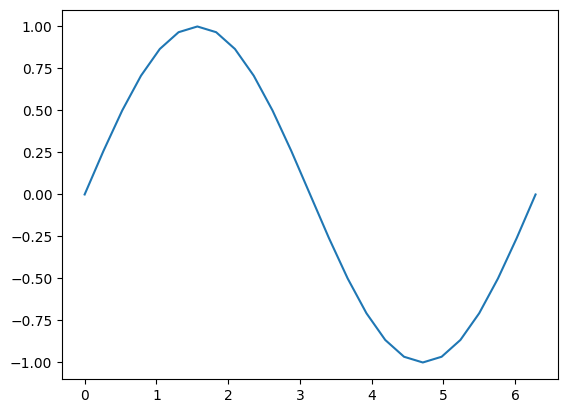

In [3]:
b = torch.sin(a)
plt.plot(a.detach(), b.detach())

In [5]:
c = 2 * b
print(c)

d = c + 1
print(d)


tensor([ 0.0000e+00,  5.1764e-01,  1.0000e+00,  1.4142e+00,  1.7321e+00,
         1.9319e+00,  2.0000e+00,  1.9319e+00,  1.7321e+00,  1.4142e+00,
         1.0000e+00,  5.1764e-01, -1.7485e-07, -5.1764e-01, -1.0000e+00,
        -1.4142e+00, -1.7321e+00, -1.9319e+00, -2.0000e+00, -1.9319e+00,
        -1.7321e+00, -1.4142e+00, -1.0000e+00, -5.1764e-01,  3.4969e-07],
       grad_fn=<MulBackward0>)
tensor([ 1.0000e+00,  1.5176e+00,  2.0000e+00,  2.4142e+00,  2.7321e+00,
         2.9319e+00,  3.0000e+00,  2.9319e+00,  2.7321e+00,  2.4142e+00,
         2.0000e+00,  1.5176e+00,  1.0000e+00,  4.8236e-01, -3.5763e-07,
        -4.1421e-01, -7.3205e-01, -9.3185e-01, -1.0000e+00, -9.3185e-01,
        -7.3205e-01, -4.1421e-01,  4.7684e-07,  4.8236e-01,  1.0000e+00],
       grad_fn=<AddBackward0>)


In [7]:
out=d.sum()
out

tensor(25., grad_fn=<SumBackward0>)

tensor([ 2.0000e+00,  1.9319e+00,  1.7321e+00,  1.4142e+00,  1.0000e+00,
         5.1764e-01, -8.7423e-08, -5.1764e-01, -1.0000e+00, -1.4142e+00,
        -1.7321e+00, -1.9319e+00, -2.0000e+00, -1.9319e+00, -1.7321e+00,
        -1.4142e+00, -1.0000e+00, -5.1764e-01,  2.3850e-08,  5.1764e-01,
         1.0000e+00,  1.4142e+00,  1.7321e+00,  1.9319e+00,  2.0000e+00])


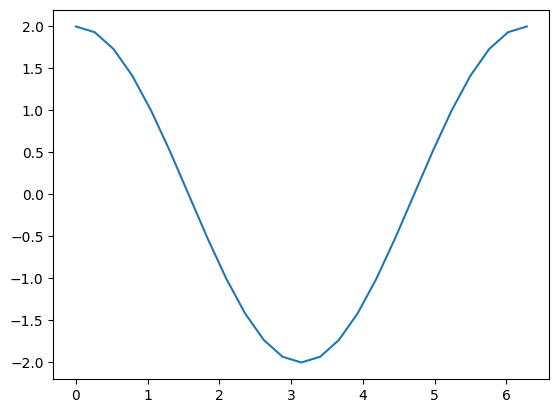

In [8]:
out.backward()
print(a.grad)
plt.plot(a.detach(),a.grad.detach())

### Example. y=2.5*x.  x is uniform distr from 0 to 10; use MSE as loss function; estimate a

In [170]:
x = torch.linspace(0., 10, steps=25, requires_grad=False)
y=2.5*x


In [171]:
est_a=torch.tensor(1.0,requires_grad=True)
est_a

tensor(1., requires_grad=True)

In [172]:
loss_history=[]
est_a_history=[]

In [175]:

for i in range(20):
    pred=est_a*x
    loss=((pred-y)**2).sum()
    loss_history.append(loss.item())
    loss.backward()
    est_a=(est_a.data-lr*est_a.grad).requires_grad_(True)
    est_a_history.append(est_a.data)

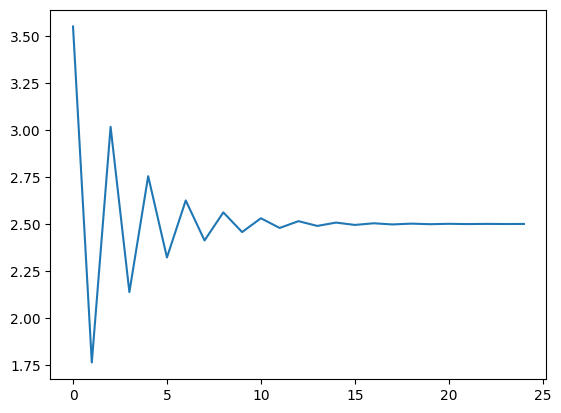

In [178]:
# plt.plot(loss_history)
plt.plot(est_a_history)

In [168]:
est_a

tensor(2.5036, requires_grad=True)

### https://optimization.cbe.cornell.edu/index.php?title=Quadratic_programming

In [245]:
x1=torch.tensor(1.0,requires_grad=True)
x2=torch.tensor(1.0,requires_grad=True)


In [246]:
y_hist=[]

In [252]:
lr=1e-4
for i in range(100):
    y=3*x1*x1+x2*x2+2*x1*x2+x1+6*x2+1
    loss=y.sum()
    y_hist.append(loss.item())
    # other constrains
    loss1=(4-2*x1+3*x2)**2
    loss=loss+loss1
    loss.backward()
    x1=torch.clip(x1.data-lr*x1.grad,0,1e5).requires_grad_(True)
    x2=torch.clip(x2.data-lr*x2.grad,0,1e5).requires_grad_(True)


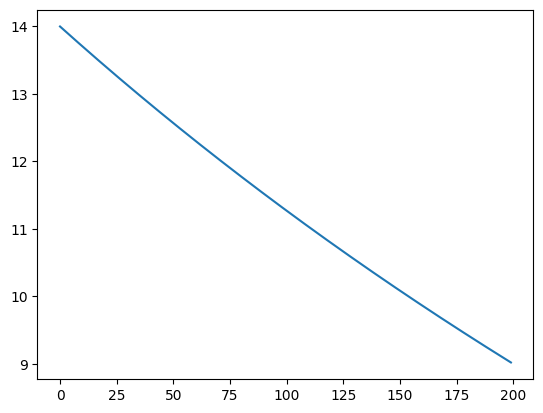

In [253]:
plt.plot(y_hist)

In [254]:
x1

tensor(1.1291, requires_grad=True)

In [255]:
x2

tensor(0.3537, requires_grad=True)

In [256]:
y

tensor(9.0205, grad_fn=<AddBackward0>)